<a href="https://colab.research.google.com/github/lilyreber/Numerical-inversion-of-characteristic-functions/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
from src.bohman1975 import A, B, C, D, E
from tests.uniform import Unif
#import tests.normal

In [24]:
def make_plot(cdf, start, stop, num):
        x = np.linspace(start, stop, num)
        F_x = np.array([cdf(y).real for y in x])

        plt.plot(x, F_x, label='Функция распределения')
        plt.title('График функции распределения')
        plt.xlabel('x')
        plt.ylabel('F(x)')
        plt.grid()
        plt.legend()
        plt.show()

# Проверим на равномерном распределении:

In [26]:
unif = Unif(0, 1)
chr = unif.chr

N = 1e3
delta = 1e-1

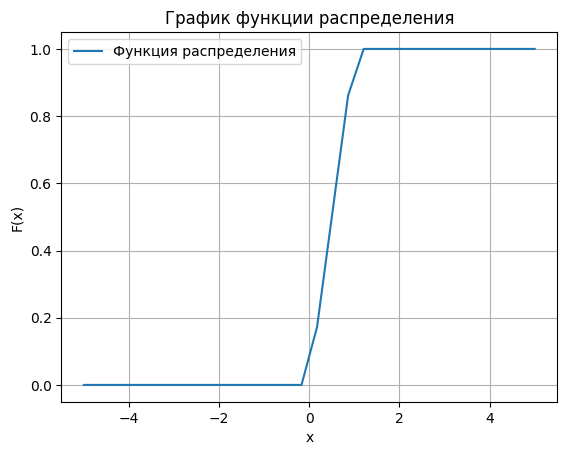

In [27]:
make_plot(unif.cdf, -5, 5, 30)

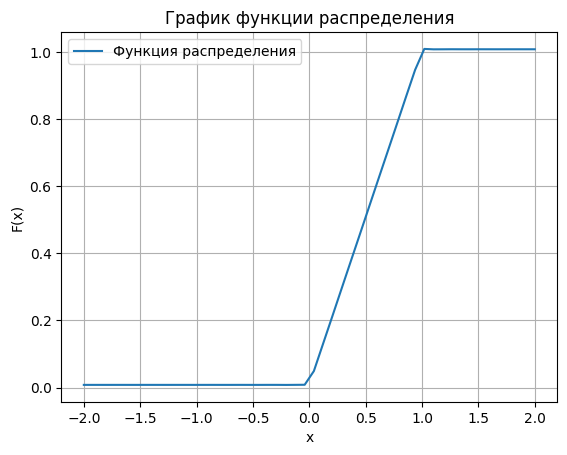

In [34]:
chr_a = A(N, delta, chr)
chr_a.make_plot(-2, 2, 50)

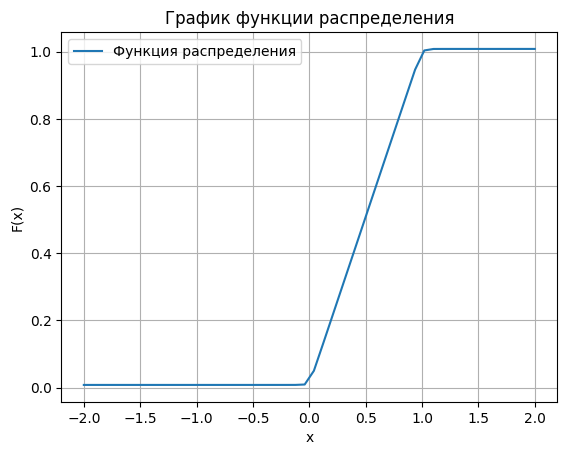

In [35]:
chr_b = B(N, delta, chr)
chr_b.make_plot(-2, 2, 50)

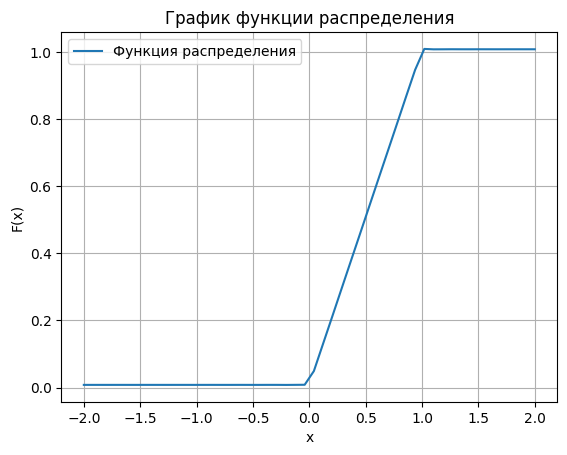

In [36]:
chr_c = C(N, delta, chr)
chr_c.make_plot(-2, 2, 50)

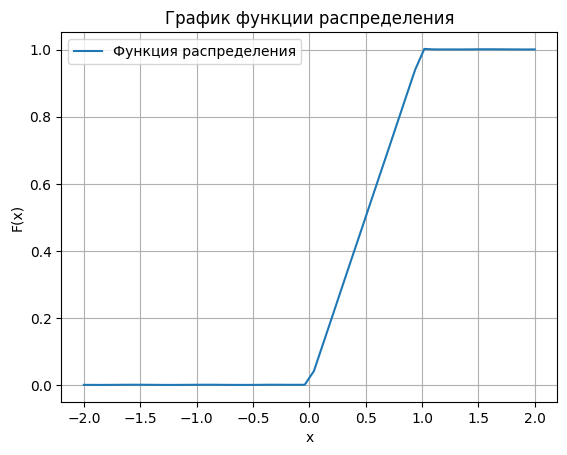

In [37]:
chr_d = D(N, delta, chr, 10)
chr_d.make_plot(-2, 2, 50)

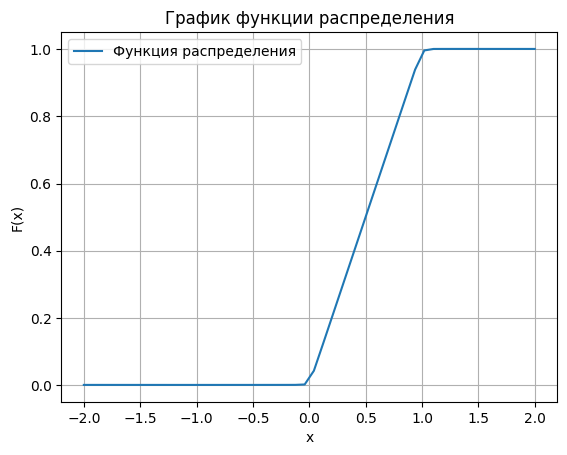

In [38]:
chr_e = E(N, delta, chr, 10)
chr_e.make_plot(-2, 2, 50)

In [ ]:
from mpmath import mp

In [ ]:
phi = lambda t : ((1 - 1j * t * sqrt(2)) ** (-0.5)) * exp((-1j * t) / sqrt(2))
N = 512
K = 4
d = 0.35 / 16
delta = (2 * pi) / (N * d)

In [ ]:
F_exact = {
    -5.60 : 0,
    -4.55 : 0,
    -3.50 : 0,
    -2.45 : 0,
    -1.40 : 0,
    -1.05 : 0,
    -0.70 : 79586,
    -0.35 : 522700,
    0 : 682690,
    0.35 : 778553,
    0.70 : 841654,
    1.40 : 915695,
    1.75 : 937693,
    2.10 : 953678,
    3.15 : 980485,
    4.20 : 991570,
    5.25 : 996298
}
xs = F_exact.keys()

In [ ]:
approxs = {
    'A' : A(N, delta, phi),
    'B' : B(N, delta, phi),
    'C' : C(N, delta, phi),
    'D' : D(N, delta, phi, K),
    'E' : E(N, delta, phi, K)
}

In [ ]:
values = []

for name in approxs:
  approx_func = approxs[name]
  values.append([(approx_func.cdf(x).real * 1e6 - F_exact[x]) for x in xs])

values = np.array(values)


array([[mpf('-2835.6557302544452'), mpf('-1269.5157399394418'),
        mpf('-574.60516745452469'), mpf('-260.97346261114222'),
        mpf('-106.93877761549368'), mpf('-56.835251529290289'),
        mpf('-4123.270735977494'), mpf('-117.33553835598286'),
        mpf('-80.103089482174255'), mpf('-61.057529963203706'),
        mpf('-50.572631704271771'), mpf('-35.741209859144874'),
        mpf('-32.067856270703487'), mpf('-27.953954378608614'),
        mpf('-21.113144348491915'), mpf('-17.787240787991323'),
        mpf('-14.791953039821237')],
       [mpf('-2822.0218915324617'), mpf('-1257.417101170957'),
        mpf('-564.68639699687571'), mpf('-255.15063682993318'),
        mpf('-115.76078106156453'), mpf('-88.472087398096747'),
        mpf('-8451.4769495937508'), mpf('-130.9534186712699'),
        mpf('-70.163900483748876'), mpf('-45.994061670964584'),
        mpf('-33.737768919207156'), mpf('-18.076166681130417'),
        mpf('-14.473948836908676'), mpf('-10.563881858834065'),
      

In [ ]:
column_names = ["A", "B", "C", "D", "E"]
res = pd.DataFrame(values.transpose(), index=xs, columns=column_names)
res

,A,B,C,D,E
-5.60,-2835.65573025445,-2822.02189153246,-2835.64501266417,20.7863329402116,1.53567873429544
-4.55,-1269.51573993944,-1257.41710117096,-1269.51572528469,6.8485707907399,0.66531766505544
-3.50,-574.605167454525,-564.686396996876,-574.605167447802,-4.24582434746905,0.111001697344409
-2.45,-260.973462611142,-255.150636829933,-260.973462610991,-12.1003603206885,-2.77148666806533
-1.40,-106.938777615494,-115.760781061565,-106.938777615678,-8.58760448309413,-12.3400570009133
-1.05,-56.8352515292903,-88.4720873980967,-56.8352515286242,11.1278816840221,-13.6753212556794
-0.70,-4123.27073597749,-8451.47694959375,-4123.27073597835,-4079.48850378684,-8395.85705634723
-0.35,-117.335538355983,-130.95341867127,-117.335538355866,-92.9850795356324,-85.920671378728
0.00,-80.1030894821743,-70.1639004837489,-80.1030894821743,-71.5548568031518,-29.4466751643922
0.35,-61.0575299632037,-45.9940616709646,-61.057529963553,-65.5433969954029,-6.79181993019301
